In [108]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the California Housing Dataset
house_data = fetch_california_housing()

# Extract the feature data (X) and target values (y)
X = house_data.data
y = house_data.target

# Check the shape of the data
print(house_data.data.shape)

(20640, 8)


In [63]:
# Setup a DataFrame
house_df = pd.DataFrame(data=X, columns=house_data.feature_names)
house_df['target'] = y

In [64]:
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Create a DataFrame for the training set with feature names as column headers
df_train = pd.DataFrame(X_train, columns=data.feature_names)

# Add the target variable 'MedHouseVal' to the DataFrame
df_train['MedHouseVal'] = y_train

# Compute the correlation matrix
correlation_matrix = df_train.corr()

# Print the correlation between 'MedHouseVal' and all the other variables
print("Correlation with MedHouseVal:")
print(correlation_matrix['MedHouseVal'].sort_values(ascending=False))

Correlation with MedHouseVal:
MedHouseVal    1.000000
MedInc         0.690647
AveRooms       0.158485
HouseAge       0.103706
AveOccup      -0.022030
Population    -0.026032
Longitude     -0.046349
AveBedrms     -0.051351
Latitude      -0.142983
Name: MedHouseVal, dtype: float64


In [67]:
# Check for missing data in the training set
missing_data = df_train.isnull().sum()

# Print the number of missing values for each feature
print("Missing Data in the Training Set:")
print(missing_data)

Missing Data in the Training Set:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


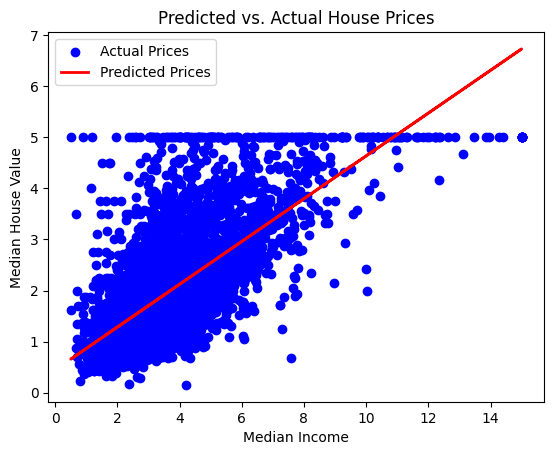

In [68]:
# Get the index of 'MedInc' in the feature_names list
medinc_index = data.feature_names.index('MedInc')

# Use only the 'MedInc' feature (median income) for training
X_train_medinc = X_train[:, np.newaxis, medinc_index]
X_test_medinc = X_test[:, np.newaxis, medinc_index]

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the median income data
model.fit(X_train_medinc, y_train)

# Predict the house prices using the test data
y_pred = model.predict(X_test_medinc)

# Plot the actual house prices vs. predicted prices
plt.scatter(X_test_medinc, y_test, color='blue', label='Actual Prices')
plt.plot(X_test_medinc, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend(loc='upper left')
plt.title('Predicted vs. Actual House Prices')
plt.show()

In [69]:
# Create a DataFrame to display the predicted and actual house prices
df_results = pd.DataFrame({'Actual House Price': y_test, 'Predicted House Price': y_pred.flatten()})

In [70]:
# Display the table
print(df_results)

      Actual House Price  Predicted House Price
0                0.47700               1.149589
1                0.45800               1.506069
2                5.00001               1.903937
3                2.18600               2.850594
4                2.78000               2.006633
...                  ...                    ...
4123             2.63300               2.375651
4124             2.66800               1.587966
4125             5.00001               4.315008
4126             0.72300               1.612455
4127             1.51500               1.934130

[4128 rows x 2 columns]


In [71]:
# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Convert R-squared (R2) to percentage
percentage_r2 = r2 * 100

print("Percentage R-squared (R2):", percentage_r2, "%")

Percentage R-squared (R2): 45.88591890384666 %


## Attempt polynomial features to improve model

In [72]:
# Create polynomial features (e.g., up to 2nd-degree polynomial)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_medinc)
X_test_poly = poly.transform(X_test_medinc)

# Create a Ridge Regression model with alpha (L2 regularization strength)
alpha = 0.1  # You can experiment with different alpha values
ridge_model = Ridge(alpha=alpha)

# Train the Ridge model on the polynomial features
ridge_model.fit(X_train_poly, y_train)

# Predict the house prices using the test data and polynomial features
y_pred = ridge_model.predict(X_test_poly)

# Calculate the R-squared (R2) score for the Ridge model
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score with Ridge Regression:", r2)

R-squared (R2) score with Ridge Regression: 0.46331776418615545


## Random Foerst Regression Model

In [94]:
# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the house prices using the test data
y_pred = rf_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE) with Random Forest:", rmse)
print("R-squared (R2) score with Random Forest:", r2)

Root Mean Squared Error (RMSE) with Random Forest: 0.5053399773665033
R-squared (R2) score with Random Forest: 0.8051230593157366


## Gradient Boosting Regression Model

In [106]:
# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=170, learning_rate=0.5, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict the house prices using the test data
y_pred = gb_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE) with Gradient Boosting:", rmse)
print("R-squared (R2) score with Gradient Boosting:", r2)

Root Mean Squared Error (RMSE) with Gradient Boosting: 0.4869382714187052
R-squared (R2) score with Gradient Boosting: 0.8190573446081444


## Extra Trees Regressor

In [112]:
# Create an Extra Trees Regressor model
extra_trees_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
extra_trees_model.fit(X_train, y_train)

# Predict the house prices using the test data
y_pred = extra_trees_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE) with Extra Trees Regressor:", rmse)
print("R-squared (R2) score with Extra Trees Regressor:", r2)

Root Mean Squared Error (RMSE) with Extra Trees Regressor: 0.5038885341799166
R-squared (R2) score with Extra Trees Regressor: 0.8062409071564614
